<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/unsupervised/cluster-insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/notebooks/classic/insurance-customers-1500.csv', sep=';')

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0]):
    # last color is black to properly display label -1 as noise (black)
    colors = np.append(np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1)))), ['#000000'])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

In [6]:
X = df[['age', 'speed']].values

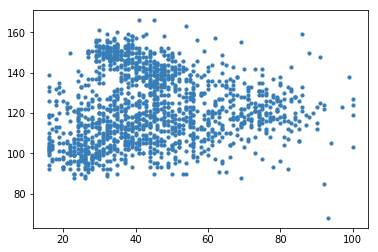

In [7]:
plot_dataset(X)

## K Means

In [8]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
y_pred = clf.predict(X)
y_pred

array([1, 2, 1, ..., 0, 1, 2])

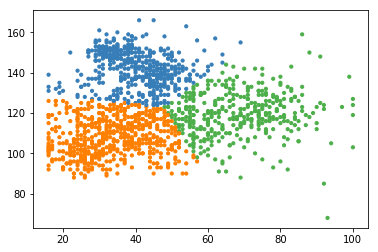

In [10]:
plot_dataset(X, y_pred)

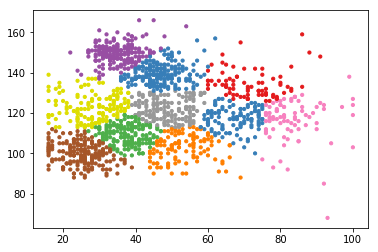

In [15]:
# from sklearn.cluster import MiniBatchKMeans
# clf = MiniBatchKMeans(n_clusters=10)

clf = KMeans(n_clusters=10)
clf.fit(X)
y_pred = clf.predict(X)
plot_dataset(X, y_pred)

## Scaling does not make a big difference for k-means

In [12]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

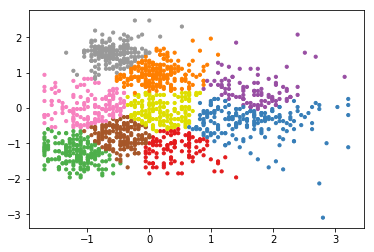

In [16]:
clf = KMeans(n_clusters=10)
clf.fit(X_scaled)
y_pred = clf.predict(X_scaled)
plot_dataset(X_scaled, y_pred)

## DBSCAN 

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
DBSCAN?

In [19]:
clf = DBSCAN()
clf.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

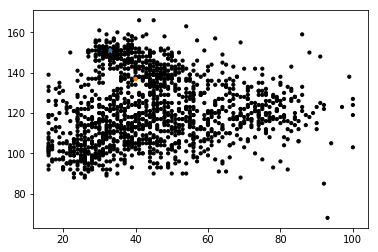

In [20]:
# black is outlier
y_pred = clf.labels_.astype(np.int)

plot_dataset(X, y_pred)

## DBSCAN is sensitive to scaling and density

* Choosing epsilon can be really handwavy
* scaling before clustering can simplify the process

In [21]:
clf = DBSCAN(eps=1.5)
clf.fit(X)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [22]:
clf.labels_

array([-1,  0, -1, ...,  3,  1, -1], dtype=int64)

In [23]:
unique_labels = set(clf.labels_)
len(unique_labels)

40

In [24]:
contains_noise = -1 in clf.labels_
contains_noise

True

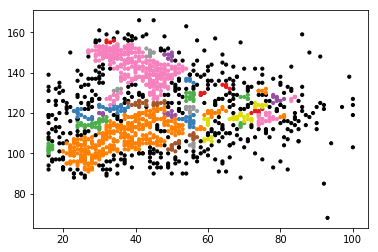

In [25]:
y_pred = clf.labels_.astype(np.int)
plot_dataset(X, y_pred)

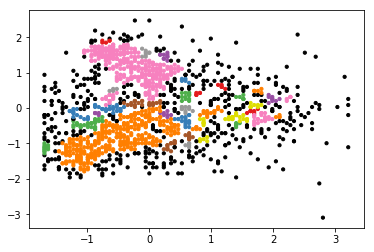

In [26]:
clf = DBSCAN(eps=0.1)
clf.fit(X_scaled)
y_pred = clf.labels_.astype(np.int)
plot_dataset(X_scaled, y_pred)

# Exercise

* execute and understand the notebook up to this point
* try clustering on other combinations of features
* you can cluster on more than 2 features, it is just hard to plot more than 2
* tweak the parameters of our two clustering algorithms for good results
* Advanced: choose another clustering algorithm and try it on our data (https://scikit-learn.org/stable/modules/clustering.html)